# Call Center Simulation

###  Summer 2020 DATA 604 // Kevin Potter

Tis simulation looks at the average hold time it takes to have a questions answered using and automated telephone system. Over the past decade we have a seen large shift in the way customer service is handled. Previously when a customer would call, you would enter a queue to which a a live person would answer the phone and attempt to help you. The result of this conversation could result in your question answered by this representative or being transferred to another department to answer the question. Nowadays most large companies you call the system is either entirely automated, where there is no live person available, or some of the hotline is automated where you go through a series of prompts to get you to the correct department. 

Staffing call centers comes at a great expense to companies so having this optimized can be a big cost saver. In this notebook I will create a sample customer service experience and examine the average time of a customer spent on the phone.

![](flowchart.png)

## Import Packages

In [113]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# Load Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Random Number Generator
import random

## Make System

The system follows the flow chart about with the following additions to the wait time. If the called is selects Options 1 goes straight to a tech support rep with an average call time of 10 minutes.   

If the caller selects billing, it goes to another menu with three options. One to change contact info with average call time of 4 minutes, two makes a payment with average additional time of 5 minutes, and other payment which has an average time of 7 minutes. 

The other option is another prompt menu with two options, one that allows the user to leave a message which will add 2 minutes, and the other suggest the user goes online to answer the question which will add 1 minute.

Each prompt menu adds 1 minute to listen to the options. 

In [56]:
state = State(call_time=0)

,values
call_time,0


In [62]:
system = System(
    init = state,
    tech=10,
    bill_1=4,
    bill_2=4,
    bill_3=7,
    other_1=2,
    other_2=1
)

,values
init,call_time 0 dtype: int64
tech,10
bill_1,4
bill_2,4
bill_3,7
other_1,2
other_2,1


## Random Option Generator

These functions generate the number that caller will chose when calling in. If no odds are passed in to skew the distribution the functions treat each option as likely as the other.

In [58]:
def main_line(odds):
    if odds == None:
        option = random.randint(1,4)
    else:
        option= random.choice([1,2,3], weights=odds)
    return option

def billing():
    return random.randint(1,4)   

def other():
    return random.randint(1,3)

## Update Function

Makes the additions in relation to the flow chart and returns the average total time on the call

In [97]:
def update_function(system, odds):
    call_time = system.init.call_time
    call_time += 1
    if odds == None:
        option = main_line(None)
        if option == 1:
            call_time += system.tech
        elif option == 2:
            call_time += 1 
            bill_option = billing()
            
            if bill_option == 1:
                call_time += system.bill_1
            elif bill_option == 2:
                call_time += system.bill_2
            else:
                call_time += system.bill_3
        
        else:
            call_time += 1
            other_option = other()
            if other_option == 1:
                call_time += system.other_1
            else:
                call_time += system.other_2
                
    else:
        option = main_line(None)
        if option == 1:
            call_time += system.tech
        elif option == 2:
            call_time += 1 
            bill_option = billing()
            
            if bill_option == 1:
                call_time += system.bill_1
            elif bill_option == 2:
                call_time += system.bill_2
            else:
                call_time += system.bill_3
        
        else:
            call_time += 1
            other_option = other()
            if other_option == 1:
                call_time += system.other_1
            else:
                call_time += system.other_2
                
    return call_time  

## Run Simulation

The simulation function runs the simulation for 1000 customer that call in and stores the information in results and returns this informaiton. 

In [100]:
def run_simulation(system, update_func, odds):
    """Runs a simulation of the system.
    
    Add a SweeSeries to the System: results
    
    system: System object
    update_func: function that updates state
    """
    
    sweep = SweepSeries()
    for n in range(1000):
        sweep[n] = update_func(system, odds)
    
    return sweep

In [101]:
results = run_simulation(system, update_function, None)
results.mean()

6.238

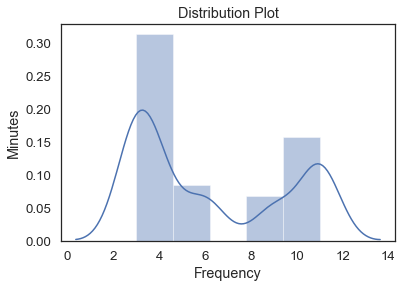

In [102]:
plt.xlabel('Frequency')
plt.ylabel('Minutes')
plt.title('Distribution Plot')
sns.distplot(results);

## Odds

This section examines the difference in average time and distributions of how long a customer may be on the phone is callers are more likely to select one of the three options from the main screen.

### Lean to Option 1

In [103]:
odds_1 = [.6,.2,.2]
results_1 = run_simulation(system, update_function, odds_1)
results_1.mean()

6.244

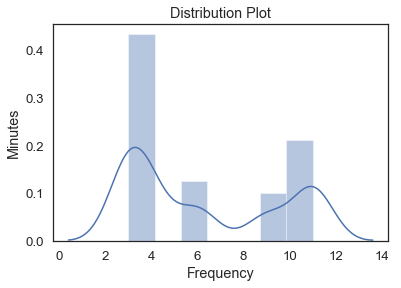

In [104]:
plt.xlabel('Frequency')
plt.ylabel('Minutes')
plt.title('Distribution Plot')
sns.distplot(results_1);

### Lean to Option 2

In [105]:
odds_2 = [.2,.6,.2]
results_2 = run_simulation(system, update_function, odds_2)
results_2.mean()

6.234

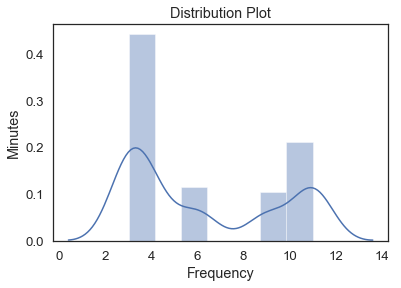

In [106]:
plt.xlabel('Frequency')
plt.ylabel('Minutes')
plt.title('Distribution Plot')
sns.distplot(results_2);

### Lean to Option 3

In [107]:
odds_3 = [.2,.2,.6]
results_3 = run_simulation(system, update_function, odds_3)
results_3.mean()

6.344

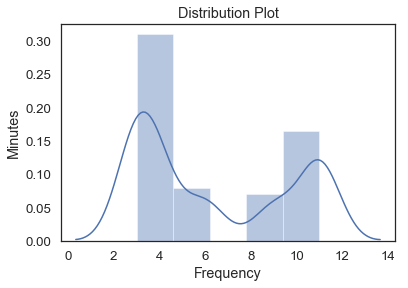

In [108]:
plt.xlabel('Frequency')
plt.ylabel('Minutes')
plt.title('Distribution Plot')
sns.distplot(results_3);

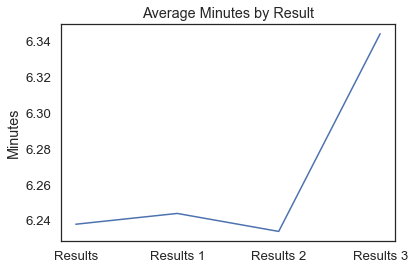

In [118]:
plt.plot([results.mean(), results_1.mean(), results_2.mean(), results_3.mean()])
plt.xticks(np.arange(4), ['Results', 'Results 1', "Results 2", "Results 3"])
plt.ylabel('Minutes')
plt.title('Average Minutes by Result');

## Conclusion

This system can be used as a starter system for observing the amount of time a person can spend on the phone with a call center. All the numbers in this system are made up but you could easily replace the data with actual wait times. Many call center systems have multiple menus with up to 9 options to select from. 

This average wait time did not really change when the options were weighted to one option or the other. The biggest increase in call time when we placed a greater likelihood toward the third option which is counterintuitive to what I would have thought.